In [1]:
library(scales)

decisionplot <- function(model, data, class = NULL, predict_type = "class",
  resolution = 100, showgrid = TRUE, alpha = 0.3, ...) {

  if(!is.null(class)) cl <- data[,class] else cl <- 1
  data <- data[,1:2]
  k <- length(unique(cl))

  plot(data, col = as.integer(cl)+1L, pch = as.integer(cl)+1L, ...)

  # make grid
  r <- sapply(data, range, na.rm = TRUE)
  xs <- seq(r[1,1], r[2,1], length.out = resolution)
  ys <- seq(r[1,2], r[2,2], length.out = resolution)
  g <- cbind(rep(xs, each=resolution), rep(ys, time = resolution))
  colnames(g) <- colnames(r)
  g <- as.data.frame(g)

  ### guess how to get class labels from predict
  ### (unfortunately not very consistent between models)
  p <- predict(model, g, type = predict_type)
  if(is.list(p)) p <- p$class
  p <- as.factor(p)

  if(showgrid) points(g, col = alpha(as.integer(p)+1L, alpha = alpha), pch = ".")

  z <- matrix(as.integer(p), nrow = resolution, byrow = TRUE)
  contour(xs, ys, z, add = TRUE, drawlabels = FALSE,
    lwd = 2, levels = (1:(k-1))+.5)

  invisible(z)
}

In [2]:
set.seed(1000)
data(iris)

# Two class case
#x <- iris[1:100, c("Sepal.Length", "Sepal.Width", "Species")]
#x$Species <- factor(x$Species)

# Three classes
x <- iris[1:150, c("Sepal.Length", "Sepal.Width", "Species")]

# Easier to separate
#x <- iris[1:150, c("Petal.Length", "Petal.Width", "Species")]

head(x)

,Sepal.Length,Sepal.Width,Species
,<dbl>,<dbl>,<fct>
1,5.1,3.5,setosa
2,4.9,3.0,setosa
3,4.7,3.2,setosa
4,4.6,3.1,setosa
5,5.0,3.6,setosa
6,5.4,3.9,setosa


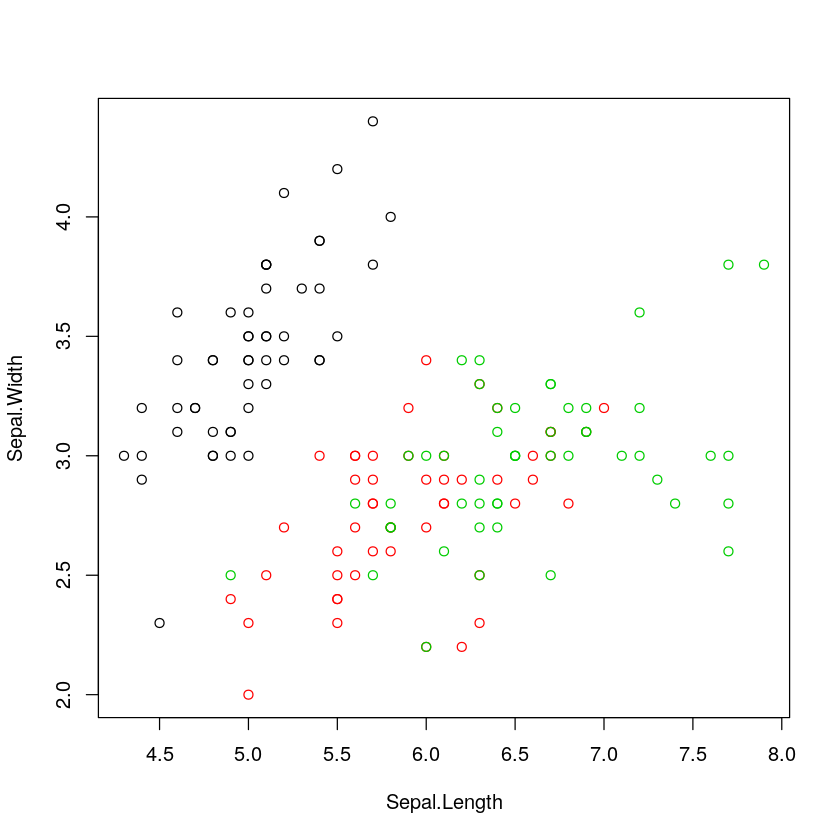

In [3]:
plot(x[,1:2], col = x[,3])

In [4]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




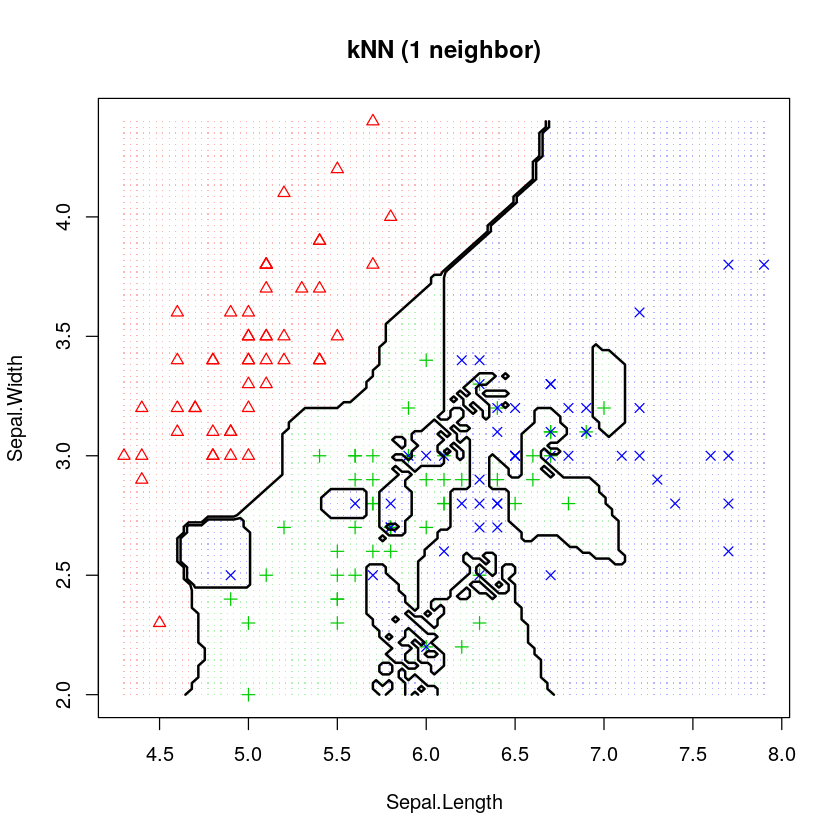

In [5]:
model <- knn3(Species ~ ., data=x, k = 1)
decisionplot(model, x, class = "Species", main = "kNN (1 neighbor)")

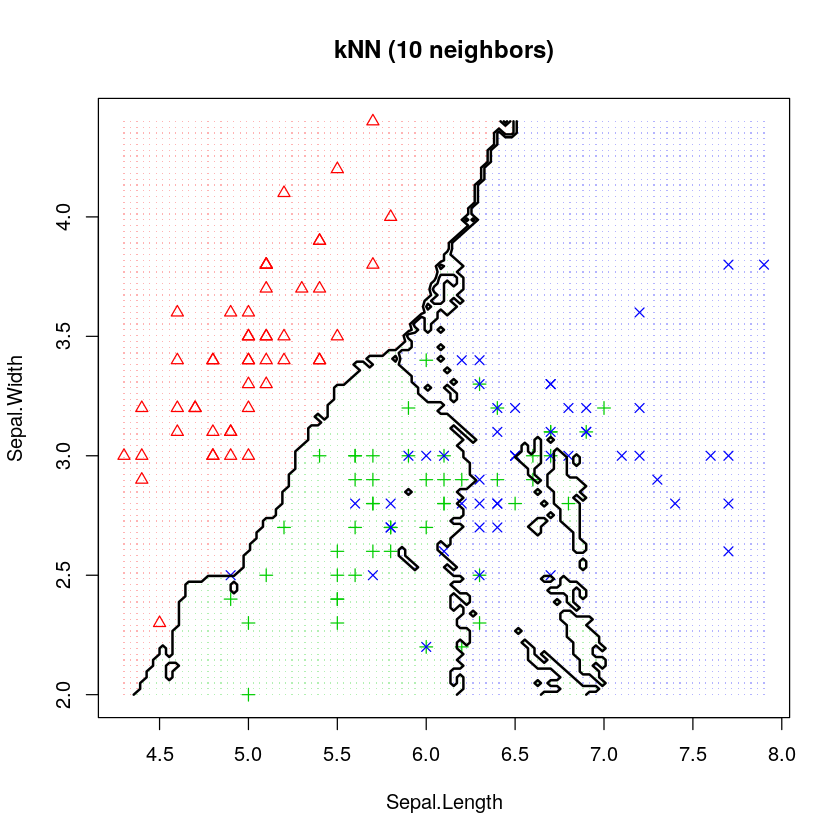

In [6]:
model <- knn3(Species ~ ., data=x, k = 10)
decisionplot(model, x, class = "Species", main = "kNN (10 neighbors)")

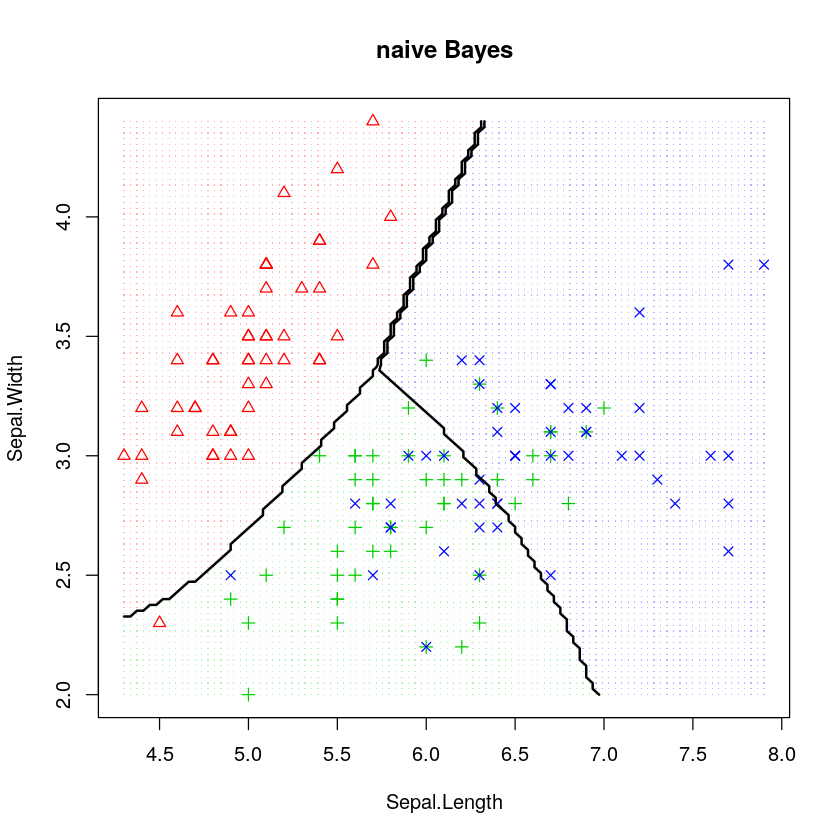

In [7]:
library(e1071)
model <- naiveBayes(Species ~ ., data=x)
decisionplot(model, x, class = "Species", main = "naive Bayes")

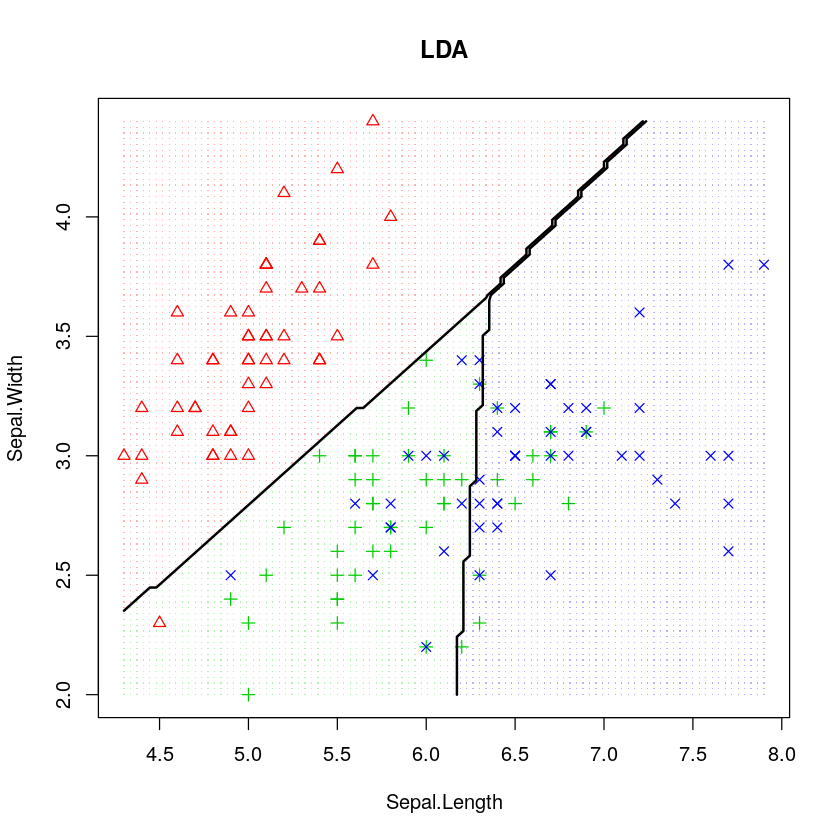

In [8]:
library(MASS)
model <- lda(Species ~ ., data=x)
decisionplot(model, x, class = "Species", main = "LDA")

In [9]:
library(nnet)
model <- multinom(Species ~., data = x)

# weights:  12 (6 variable)
initial  value 164.791843 
iter  10 value 62.715967
iter  20 value 59.808291
iter  30 value 55.445984
iter  40 value 55.375704
iter  50 value 55.346472
iter  60 value 55.301707
iter  70 value 55.253532
iter  80 value 55.243230
iter  90 value 55.230241
iter 100 value 55.212479
final  value 55.212479 
stopped after 100 iterations


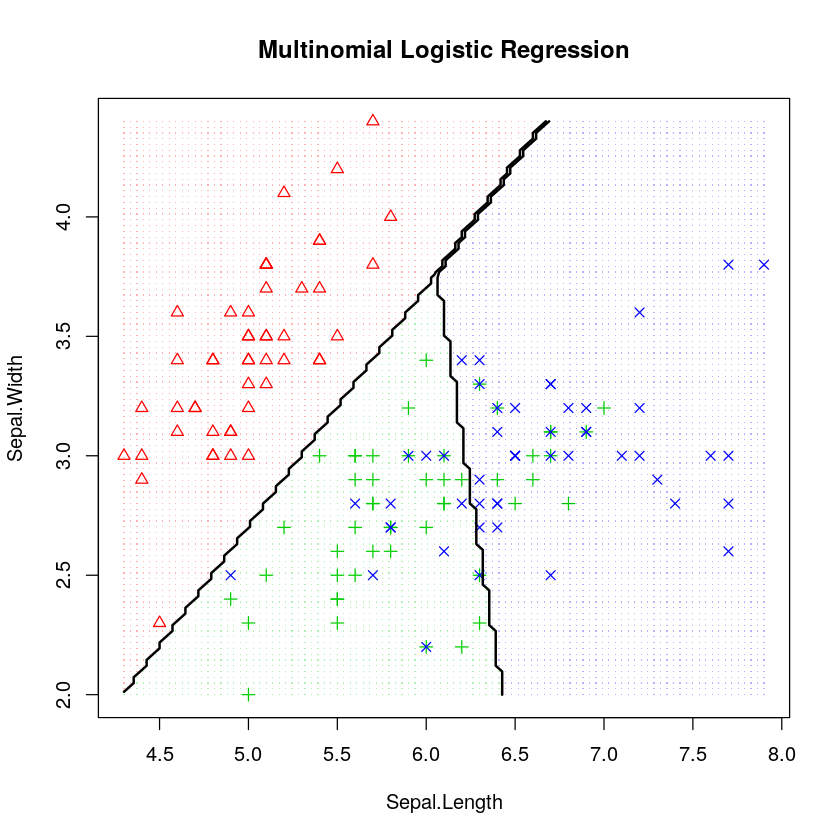

In [10]:
decisionplot(model, x, class = "Species", main = "Multinomial Logistic Regression")

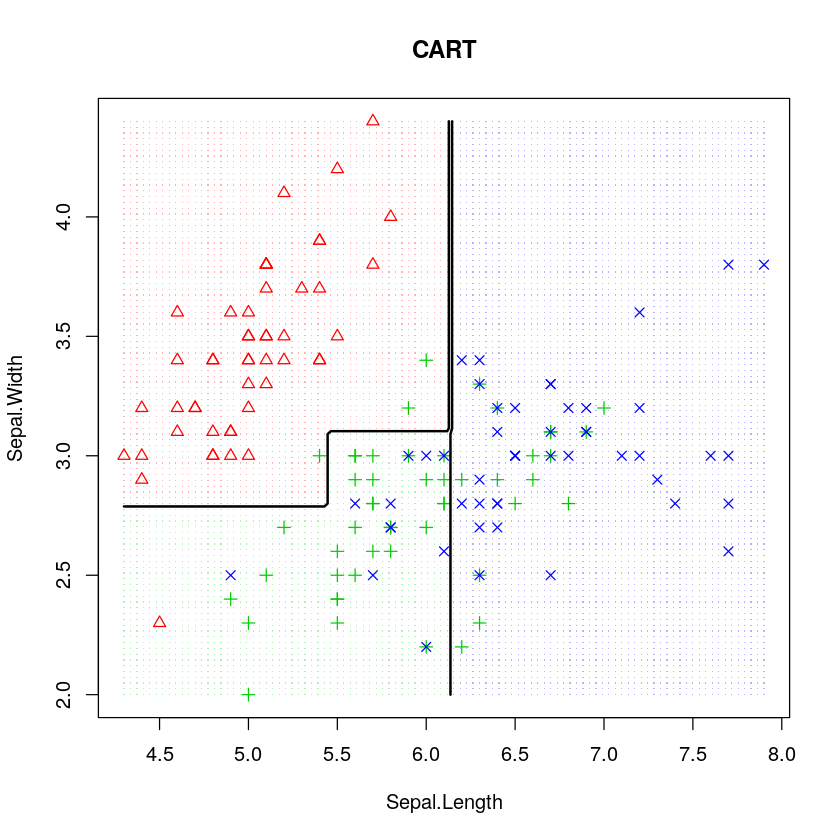

In [11]:
library("rpart")
model <- rpart(Species ~ ., data=x)
decisionplot(model, x, class = "Species", main = "CART")

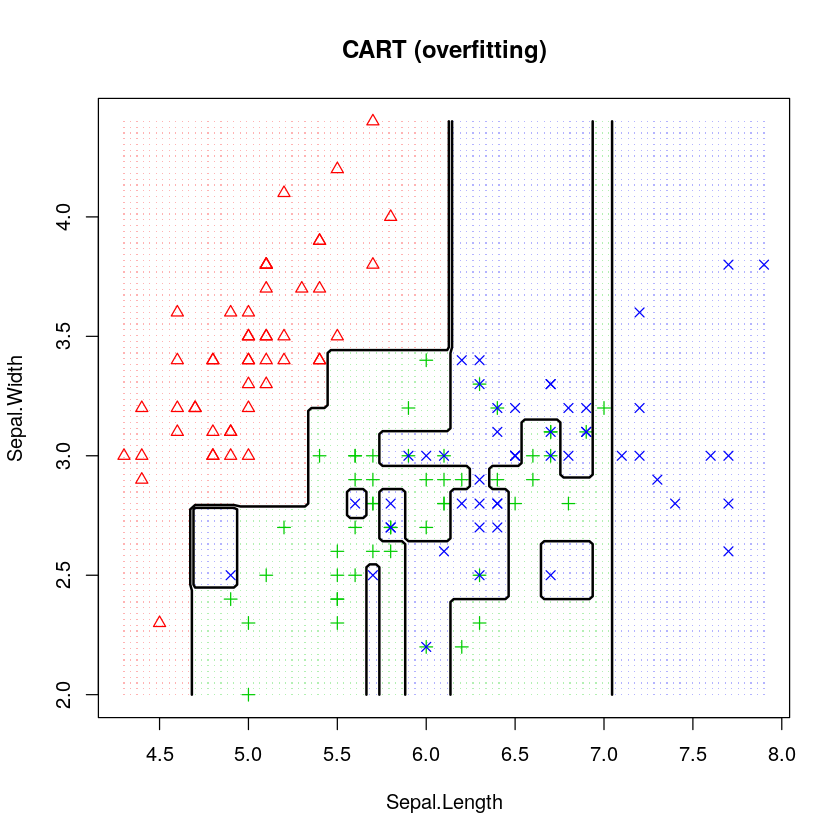

In [12]:
model <- rpart(Species ~ ., data=x,
  control = rpart.control(cp = 0.001, minsplit = 1))
decisionplot(model, x, class = "Species", main = "CART (overfitting)")

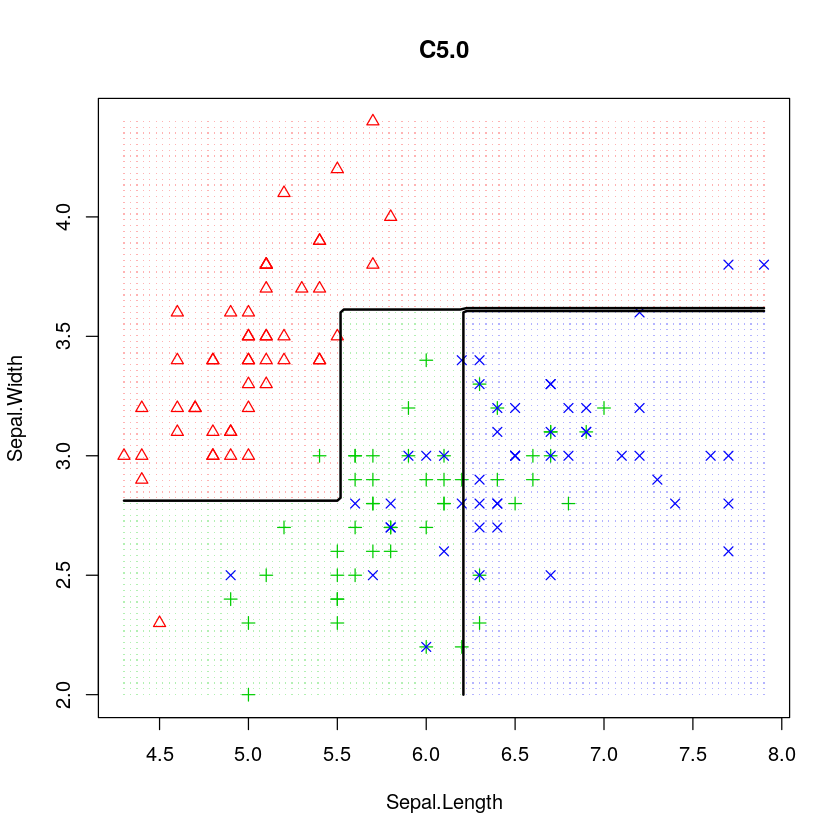

In [13]:
library(C50)
model <- C5.0(Species ~ ., data=x)
decisionplot(model, x, class = "Species", main = "C5.0")

In [14]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




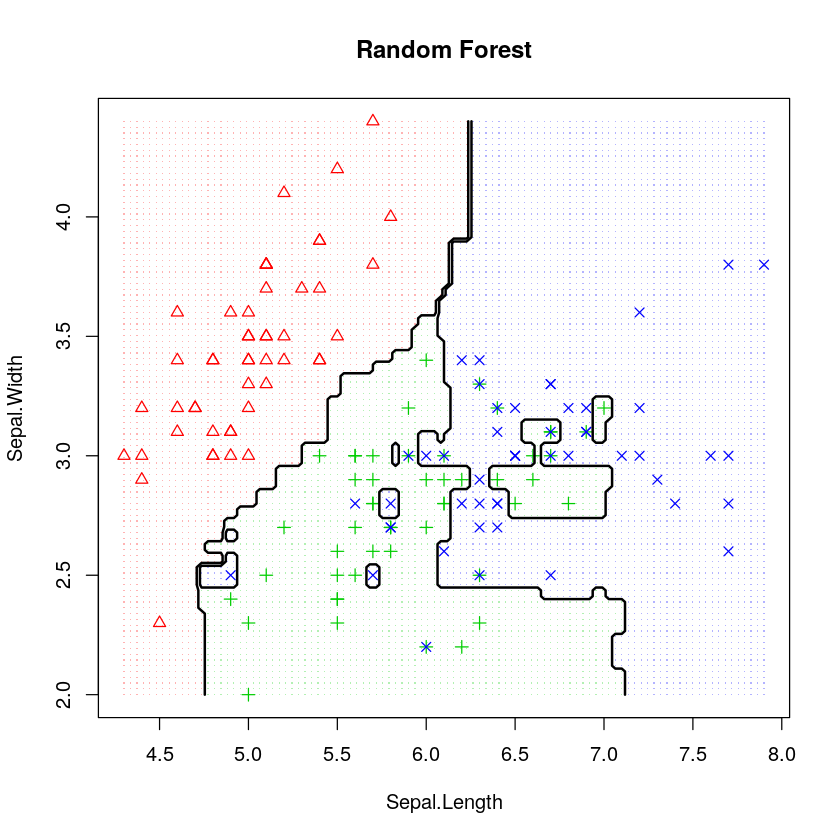

In [15]:
model <- randomForest(Species ~ ., data=x)
decisionplot(model, x, class = "Species", main = "Random Forest")

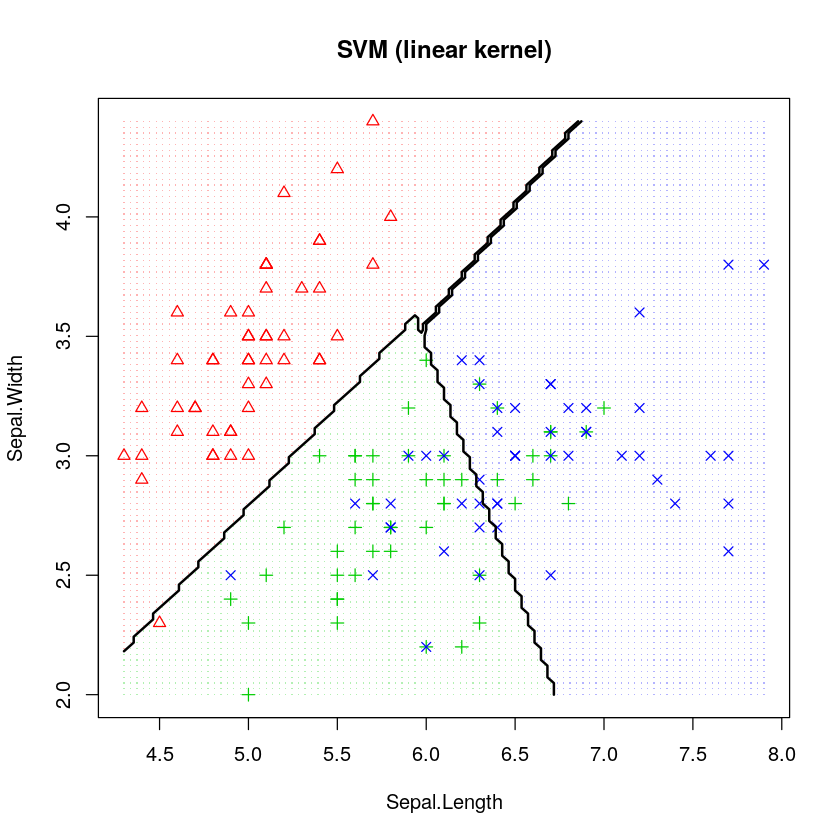

In [16]:
library(e1071)
model <- svm(Species ~ ., data=x, kernel="linear")
decisionplot(model, x, class = "Species", main = "SVM (linear kernel)")

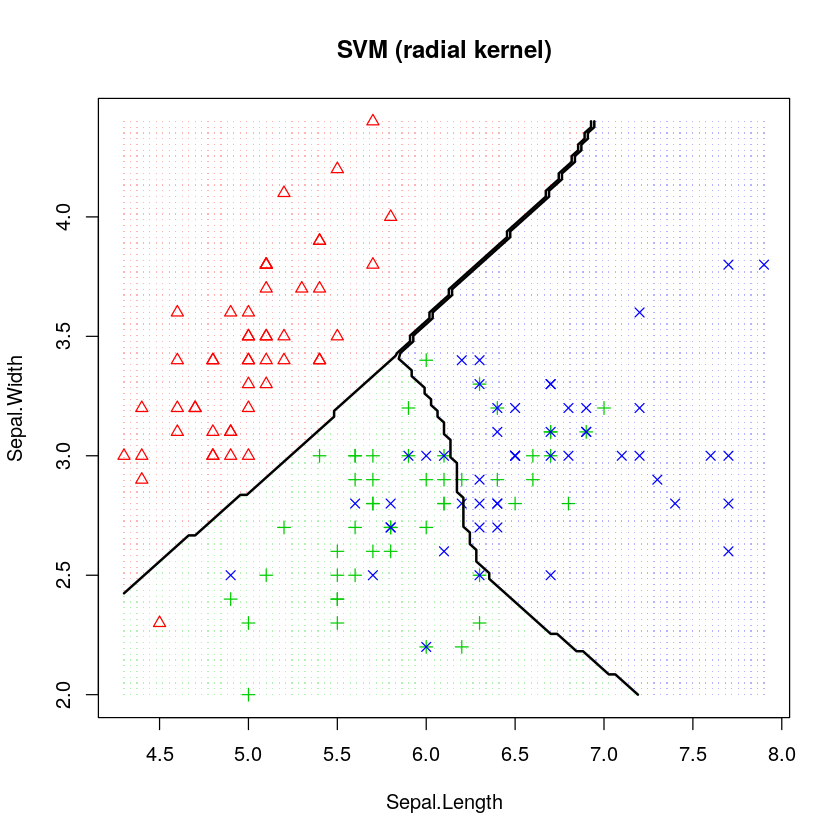

In [17]:
model <- svm(Species ~ ., data=x, kernel = "radial")
decisionplot(model, x, class = "Species", main = "SVM (radial kernel)")

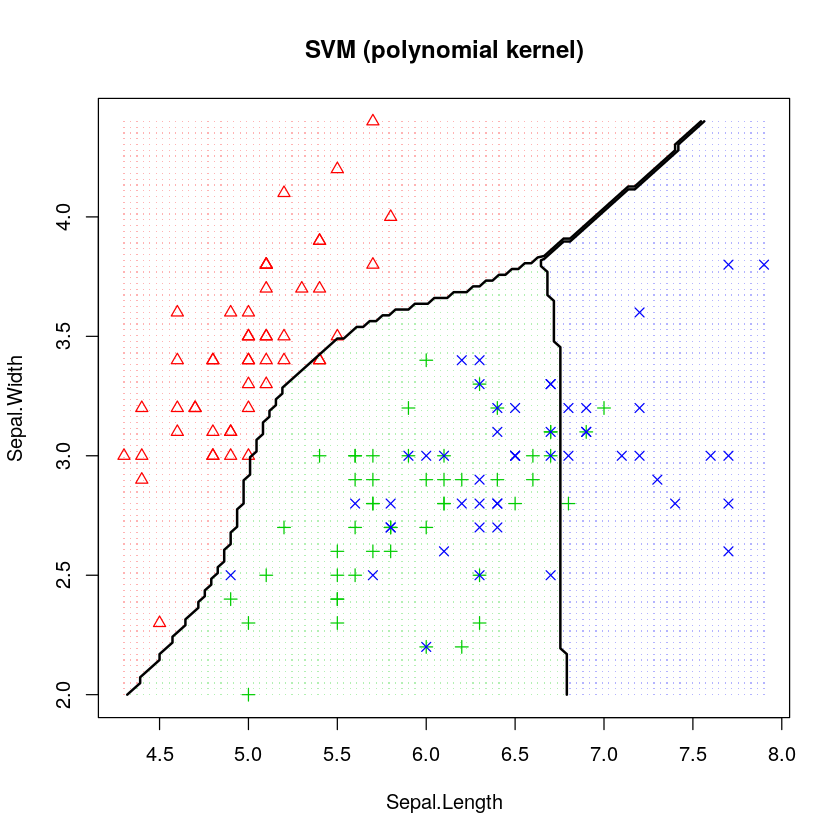

In [18]:
model <- svm(Species ~ ., data=x, kernel = "polynomial")
decisionplot(model, x, class = "Species", main = "SVM (polynomial kernel)")

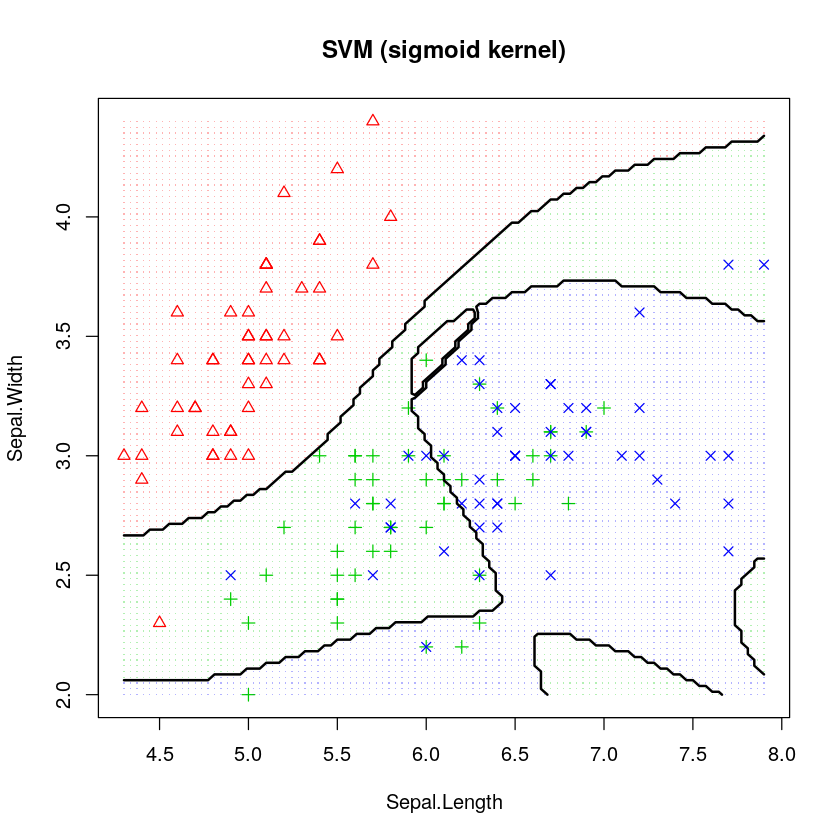

In [19]:
model <- svm(Species ~ ., data=x, kernel = "sigmoid")
decisionplot(model, x, class = "Species", main = "SVM (sigmoid kernel)")